In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
import seaborn as sns

<AxesSubplot:xlabel='Height', ylabel='Count'>

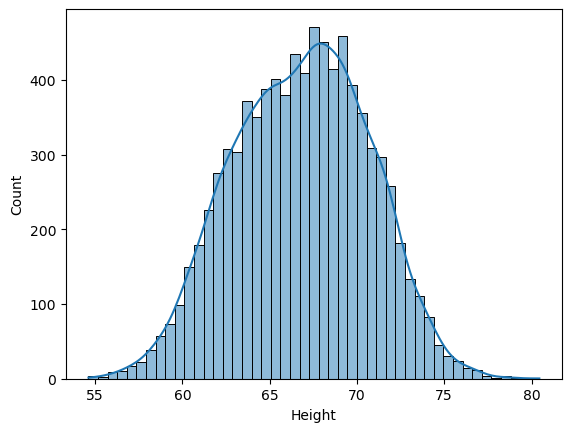

In [5]:
sns.histplot(df['Height'], kde=True)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

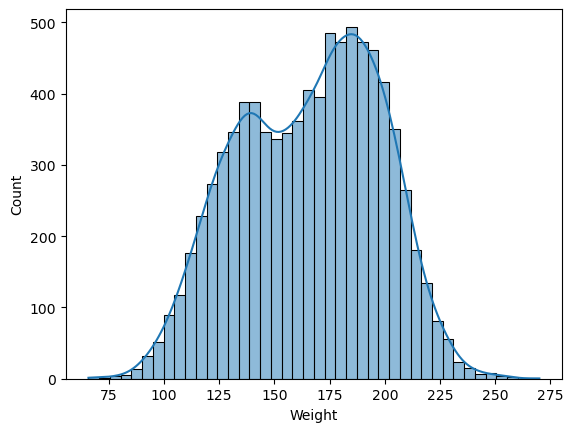

In [6]:
sns.histplot(df['Weight'], kde=True)

In [7]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()

# Z Scores

In [8]:
df['zscores'] = (df['Height'] - df['Height'].mean()) / df['Height'].std()

In [9]:
df.head()

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


# Standard Scaler

In [ ]:
#Height

In [ ]:
df.tail()

In [10]:
df.zscores.max()

3.5415386870680865

In [11]:
df.zscores.min()

-3.1658344959558185

In [15]:
df.zscores.mean()+1 # mean is 0

1.0000000000000453

In [13]:
df.zscores.std() # std is 1

0.9999999999999981

# Remove outlier

In [16]:
max_z = df.zscores.max()
min_z = df.zscores.min()

In [17]:
min_z

-3.1658344959558185

In [18]:
max_z

3.5415386870680865

In [23]:
df[(df['zscores'] >3)]

,Gender,Height,Weight,zscores
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
6328,Female,80.450000,178.020675,3.541539


In [22]:
df.shape

(8555, 4)

In [24]:
after_remove_otliers = df[(df['zscores'] <3) & (df['zscores']>-3)]
after_remove_otliers

,Gender,Height,Weight,zscores
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587
...,...,...,...,...
8550,Female,60.483946,110.565497,-1.642491
8551,Female,63.423372,129.921671,-0.879292
8552,Female,65.584057,155.942671,-0.318287
8553,Female,67.429971,151.678405,0.160990


In [26]:
#who are the outliers?
df[(df['zscores'] >3) | (df['zscores']<-3)]

,Gender,Height,Weight,zscores
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
6328,Female,80.450000,178.020675,3.541539
6624,Female,54.616858,71.393749,-3.165834
7294,Female,54.873728,78.606670,-3.099140
7617,Female,55.148557,88.812412,-3.027783


In [27]:
df.shape

(8555, 4)

In [28]:
df[df['zscores'] >3]

,Gender,Height,Weight,zscores
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
6328,Female,80.450000,178.020675,3.541539


In [29]:
df[df['zscores'] < -3]

,Gender,Height,Weight,zscores
6624,Female,54.616858,71.393749,-3.165834
7294,Female,54.873728,78.606670,-3.099140
7617,Female,55.148557,88.812412,-3.027783


# STD

In [30]:
mean = df2.Height.mean()

In [31]:
std = df2.Height.std()

In [32]:
sigma_3 = mean + (3*std)
sigma_3_neg = mean - (3*std)

In [33]:
sigma_3

78.36428842382108

In [34]:
sigma_3_neg

55.25556183435742

In [35]:
df2[df2['Height'] > sigma_3]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [36]:
df2[df2['Height'] < sigma_3_neg]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [38]:
df[(df['zscores'] >3) | (df['zscores']<-3)]

,Gender,Height,Weight,zscores
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
6328,Female,80.450000,178.020675,3.541539
6624,Female,54.616858,71.393749,-3.165834
7294,Female,54.873728,78.606670,-3.099140
7617,Female,55.148557,88.812412,-3.027783


In [39]:
after_remove_df2 = df2[(df2['Height'] > sigma_3) | (df2['Height']<sigma_3_neg)] #only outliers
after_remove_df2

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [40]:
df2.shape

(8555, 3)

In [41]:
df2[(df2.Height<sigma_3_neg) | (df2.Height>sigma_3) ]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [42]:
df[(df['zscores'] >3) | (df['zscores'] < -3)]

,Gender,Height,Weight,zscores
1317,Male,78.462053,227.342565,3.025384
2014,Male,78.998742,269.989698,3.164731
3285,Male,78.528210,253.889004,3.042561
3757,Male,78.621374,245.733783,3.066750
6328,Female,80.450000,178.020675,3.541539
6624,Female,54.616858,71.393749,-3.165834
7294,Female,54.873728,78.606670,-3.099140
7617,Female,55.148557,88.812412,-3.027783


In [43]:
after_remove_df2 = df2[(df2['Height'] < sigma_3) & (df2['Height']>sigma_3_neg)] # no outliers 
after_remove_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


# Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2326f9df0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b23270b3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2326f9af0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b23270b970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b23270bc40>],
 'means': []}

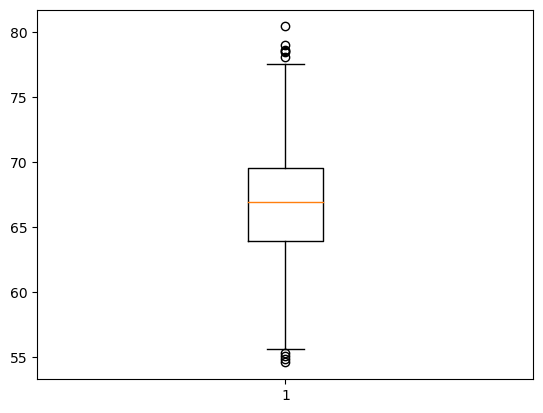

In [44]:
fig, ax = plt.subplots()
ax.boxplot(df['Height'])

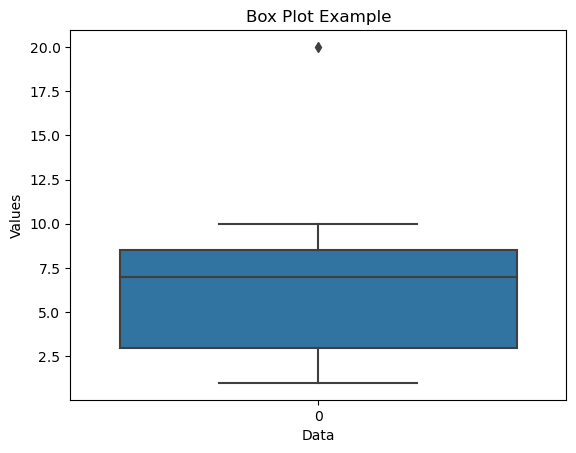

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
data = [1,2,3,3,5,7,7,8,9,10,20]

# Create a box plot
sns.boxplot(data=data)

# Add labels and title
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot Example')

# Display the plot
plt.show()


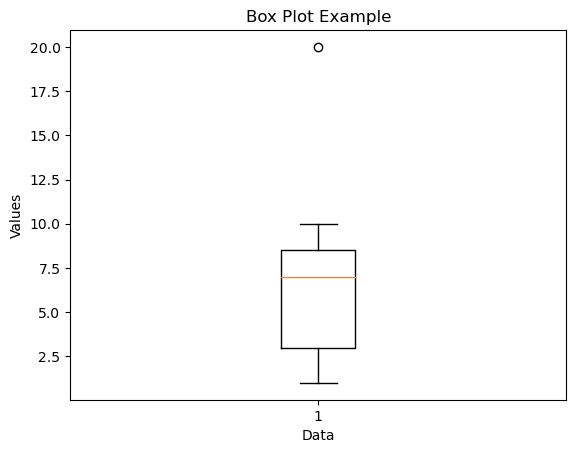

In [46]:
import matplotlib.pyplot as plt
# Sample dataset
data = [1,2,3,3,5,7,7,8,9,10,20]
# Create a figure and axis
fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(data)

# Add labels and title
ax.set_xlabel('Data')
ax.set_ylabel('Values')
ax.set_title('Box Plot Example')
# Display the plot
plt.show()
